In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install openpyxl
import math

In [229]:
df = pd.read_csv('Gold_Yearly .csv')

In [231]:
df.head()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   53 non-null     int64  
 1   Average
Closing Price  53 non-null     float64
 2   Year Open              53 non-null     float64
 3   Year High              53 non-null     float64
 4   Year Low               53 non-null     float64
 5   Year Close             53 non-null     float64
 6   Annual
% Change        53 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [234]:
df.head()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   53 non-null     int64  
 1   Average
Closing Price  53 non-null     float64
 2   Year Open              53 non-null     float64
 3   Year High              53 non-null     float64
 4   Year Low               53 non-null     float64
 5   Year Close             53 non-null     float64
 6   Annual
% Change        53 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [236]:
df.isnull().sum()

Year                      0
Average\nClosing Price    0
Year Open                 0
Year High                 0
Year Low                  0
Year Close                0
Annual\n% Change          0
dtype: int64

In [237]:
df = df.fillna(0)

## EDA & Korelasi

In [238]:
corr = df.corr()

<Axes: >

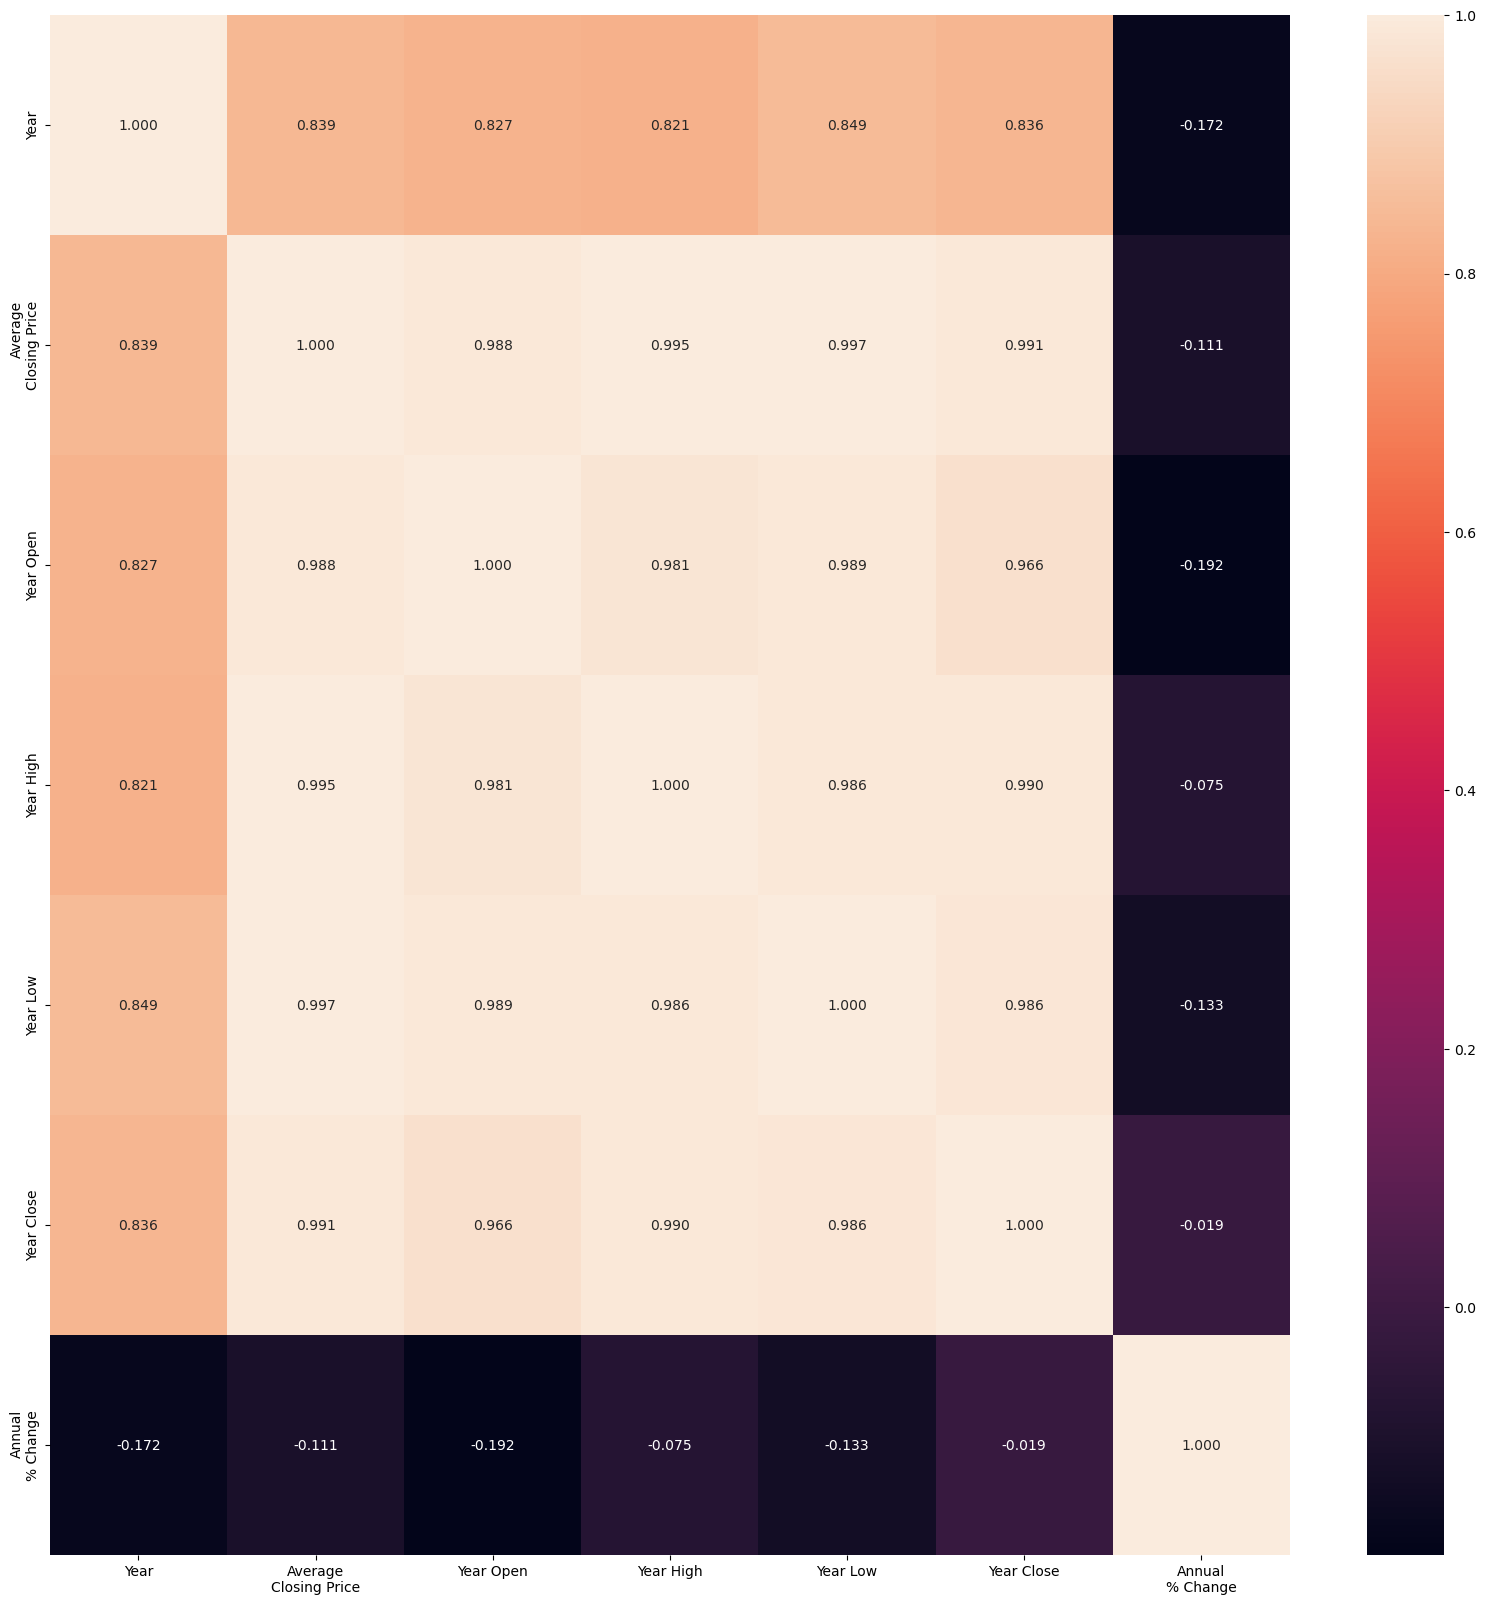

In [239]:
plt.figure(figsize=(20,20))



sns.heatmap(corr,annot=True, fmt='.3f')

## Pemilihan Variabel bebas dan terikat

In [241]:
#Korelasi diatas 0,9
x = df[['Average\nClosing Price', 'Year Open','Year Close']]
y = df[['Year Low']]
print(x.shape)
print(y.shape)

(53, 3)
(53, 1)


### Split model 1

In [262]:
from sklearn.model_selection import train_test_split
#Membagi data menjadi data train dan data test dengan perbandingan  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42, 3)
(42, 1)
(11, 3)
(11, 1)


In [263]:
from sklearn.linear_model import LinearRegression

In [264]:
import numpy as np
from sklearn import metrics



In [265]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [266]:
print('Intercept/bias', model1.intercept_)
print('Koefisien', model1.coef_)

Intercept/bias [-7.03039892]
Koefisien [[0.64433966 0.18711634 0.06188974]]


## Rumus model1
### y = ax1 + ax2 + ax3 + b
### y = 0.64433966 * Average\nClosing Price + 0.18711634 * Year Open + 0.06188974 * Year Close + b

### a = koefisien 
### b = bias
### x = variabel independen

In [267]:
import numpy as np 

In [268]:
pred = model1.predict(x_test)
print(pred)

[[ 340.84608685]
 [  42.63770269]
 [1111.19869621]
 [ 315.61391746]
 [ 242.57762577]
 [ 361.64443201]
 [ 765.92487724]
 [ 335.74006841]
 [ 339.57622474]
 [ 613.37263141]
 [ 300.85703272]]


### Evaluasi 1

In [269]:
rmse = np.sqrt(mean_squared_error(np.array(y_test),pred))

In [270]:
rmse

29.823294559828135

In [271]:
accuracy = r2_score(y_test, pred)
accuracy

0.9881536194816646

### Split model 2 

In [282]:
from sklearn.model_selection import train_test_split
#Membagi data menjadi data train dan data test dengan perbandingan 90 : 10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(47, 3)
(47, 1)
(6, 3)
(6, 1)


In [273]:
from sklearn.linear_model import LinearRegression

In [274]:
import numpy as np
from sklearn import metrics

In [275]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [276]:
print('Intercept/bias', model2.intercept_)
print('Koefisien', model2.coef_)

Intercept/bias [-5.31524549]
Koefisien [[0.63185699 0.19333159 0.06524284]]


## Rumus model1
### y = ax1 + ax2 + ax3 + b
### y = 0.63185699 * Average\nClosing Price + 0.19333159 * Year Open + 0.06524284 * Year Close + b

### a = koefisien 
### b = bias
### x = variabel independen

In [277]:
import numpy as np 

In [278]:
pred2 = model2.predict(x_test)
print(pred2)

[[ 341.71719464]
 [  44.11547789]
 [1108.7123011 ]
 [ 316.07668826]
 [ 243.47372925]
 [ 362.29678878]]


### Evaluasi 2

In [279]:
rmse2 = np.sqrt(mean_squared_error(np.array(y_test),pred2))

In [280]:
rmse2

19.089463224163843

In [281]:
accuracy = r2_score(y_test, pred2)
accuracy

0.9969016899170703